# Plant Communication Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d efeyldz/plant-communication-dataset-classification

Dataset URL: https://www.kaggle.com/datasets/efeyldz/plant-communication-dataset-classification
License(s): CC0-1.0
  0%|                                               | 0.00/20.4k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 20.4k/20.4k [00:00<00:00, 916kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Plant Communication Classification/plant-communication-dataset-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Plant Communication Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("alien_plant_communication_dataset.csv")

In [6]:
df.head()

,Plant_ID,Leaf_Vibration_Hz,Pollen_Scent_Complexity,Bioluminescence_Intensity_Lux,Root_Signal_Strength_mV,Growth_Rate_mm_day,Ambient_Temperature_C,Soil_Moisture_Level,Sunlight_Exposure_Hours,Symbiotic_Fungus_Present,Plant_Message_Type
0,PLANT_0001,57.45,7,2.70,117.61,2.25,25.6,0.27,9.5,0,Distress
1,PLANT_0002,47.93,1,21.55,208.47,4.46,15.3,0.28,9.9,0,Warning
2,PLANT_0003,59.72,8,3.53,193.31,5.05,34.3,0.41,8.9,0,Invitation
3,PLANT_0004,72.85,3,5.90,149.65,1.53,23.6,0.36,5.8,1,Distress
4,PLANT_0005,46.49,6,58.61,135.20,4.89,24.3,0.82,5.2,1,Contentment


In [7]:
df.shape

(1000, 11)

In [8]:
df.size

11000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Plant_ID                       1000 non-null   object 
 1   Leaf_Vibration_Hz              1000 non-null   float64
 2   Pollen_Scent_Complexity        1000 non-null   int64  
 3   Bioluminescence_Intensity_Lux  1000 non-null   float64
 4   Root_Signal_Strength_mV        1000 non-null   float64
 5   Growth_Rate_mm_day             1000 non-null   float64
 6   Ambient_Temperature_C          1000 non-null   float64
 7   Soil_Moisture_Level            1000 non-null   float64
 8   Sunlight_Exposure_Hours        1000 non-null   float64
 9   Symbiotic_Fungus_Present       1000 non-null   int64  
 10  Plant_Message_Type             1000 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 86.1+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Leaf_Vibration_Hz,1000.0,50.29007,14.688191,1.38,40.2850,50.380,59.7225,107.79
Pollen_Scent_Complexity,1000.0,5.50100,2.833377,1.00,3.0000,5.000,8.0000,10.00
Bioluminescence_Intensity_Lux,1000.0,20.54489,20.862039,0.00,5.8525,14.785,28.4825,163.18
Root_Signal_Strength_mV,1000.0,200.49457,50.203673,33.02,166.0475,200.990,236.5650,334.22
Growth_Rate_mm_day,1000.0,4.93342,2.006418,-1.09,3.5625,4.945,6.3500,11.19
Ambient_Temperature_C,1000.0,22.17700,4.899745,7.50,18.7750,22.100,25.5000,42.30
Soil_Moisture_Level,1000.0,0.50273,0.197495,0.00,0.3700,0.510,0.6400,1.00
Sunlight_Exposure_Hours,1000.0,6.00900,2.007289,0.00,4.6000,6.050,7.3000,12.80
Symbiotic_Fungus_Present,1000.0,0.61200,0.487538,0.00,0.0000,1.000,1.0000,1.00


In [11]:
df.isnull().sum()

Plant_ID                         0
Leaf_Vibration_Hz                0
Pollen_Scent_Complexity          0
Bioluminescence_Intensity_Lux    0
Root_Signal_Strength_mV          0
Growth_Rate_mm_day               0
Ambient_Temperature_C            0
Soil_Moisture_Level              0
Sunlight_Exposure_Hours          0
Symbiotic_Fungus_Present         0
Plant_Message_Type               0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

Plant_ID                         1000
Leaf_Vibration_Hz                 910
Pollen_Scent_Complexity            10
Bioluminescence_Intensity_Lux     898
Root_Signal_Strength_mV           973
Growth_Rate_mm_day                562
Ambient_Temperature_C             219
Soil_Moisture_Level                94
Sunlight_Exposure_Hours           106
Symbiotic_Fungus_Present            2
Plant_Message_Type                  4
dtype: int64

In [14]:
df['Plant_Message_Type'].value_counts()

Plant_Message_Type
Contentment    408
Warning        212
Distress       193
Invitation     187
Name: count, dtype: int64

## Data Visualization

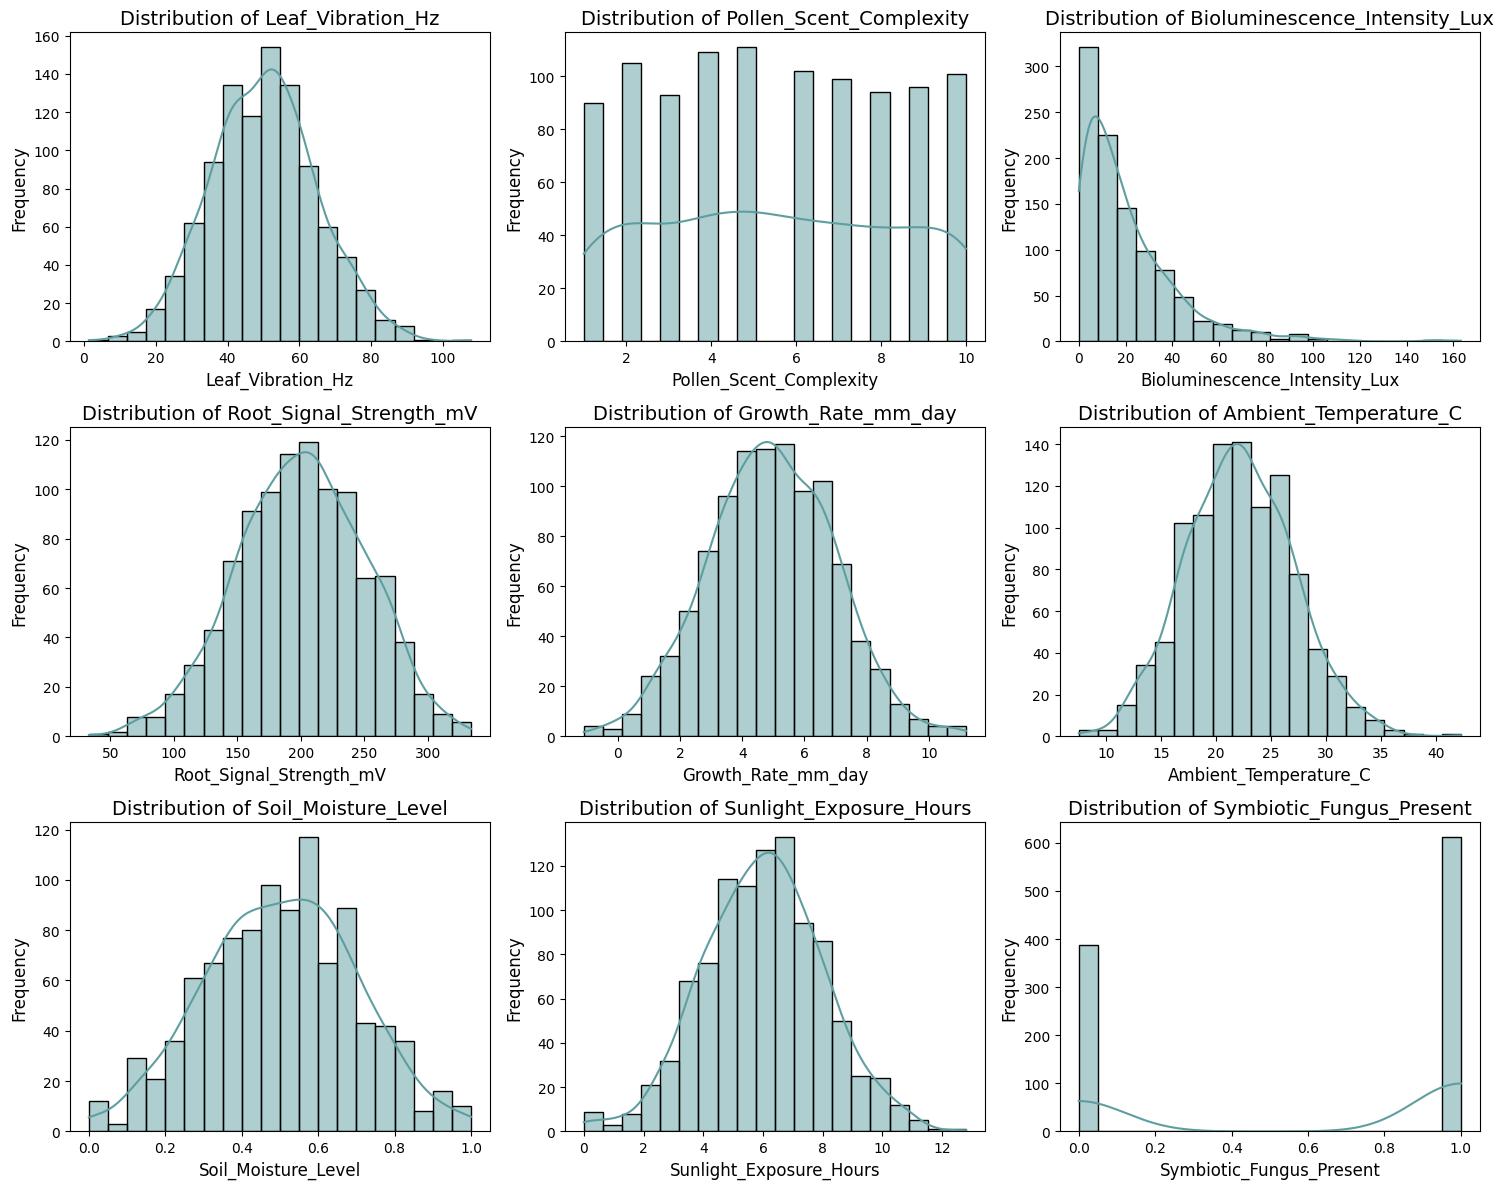

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

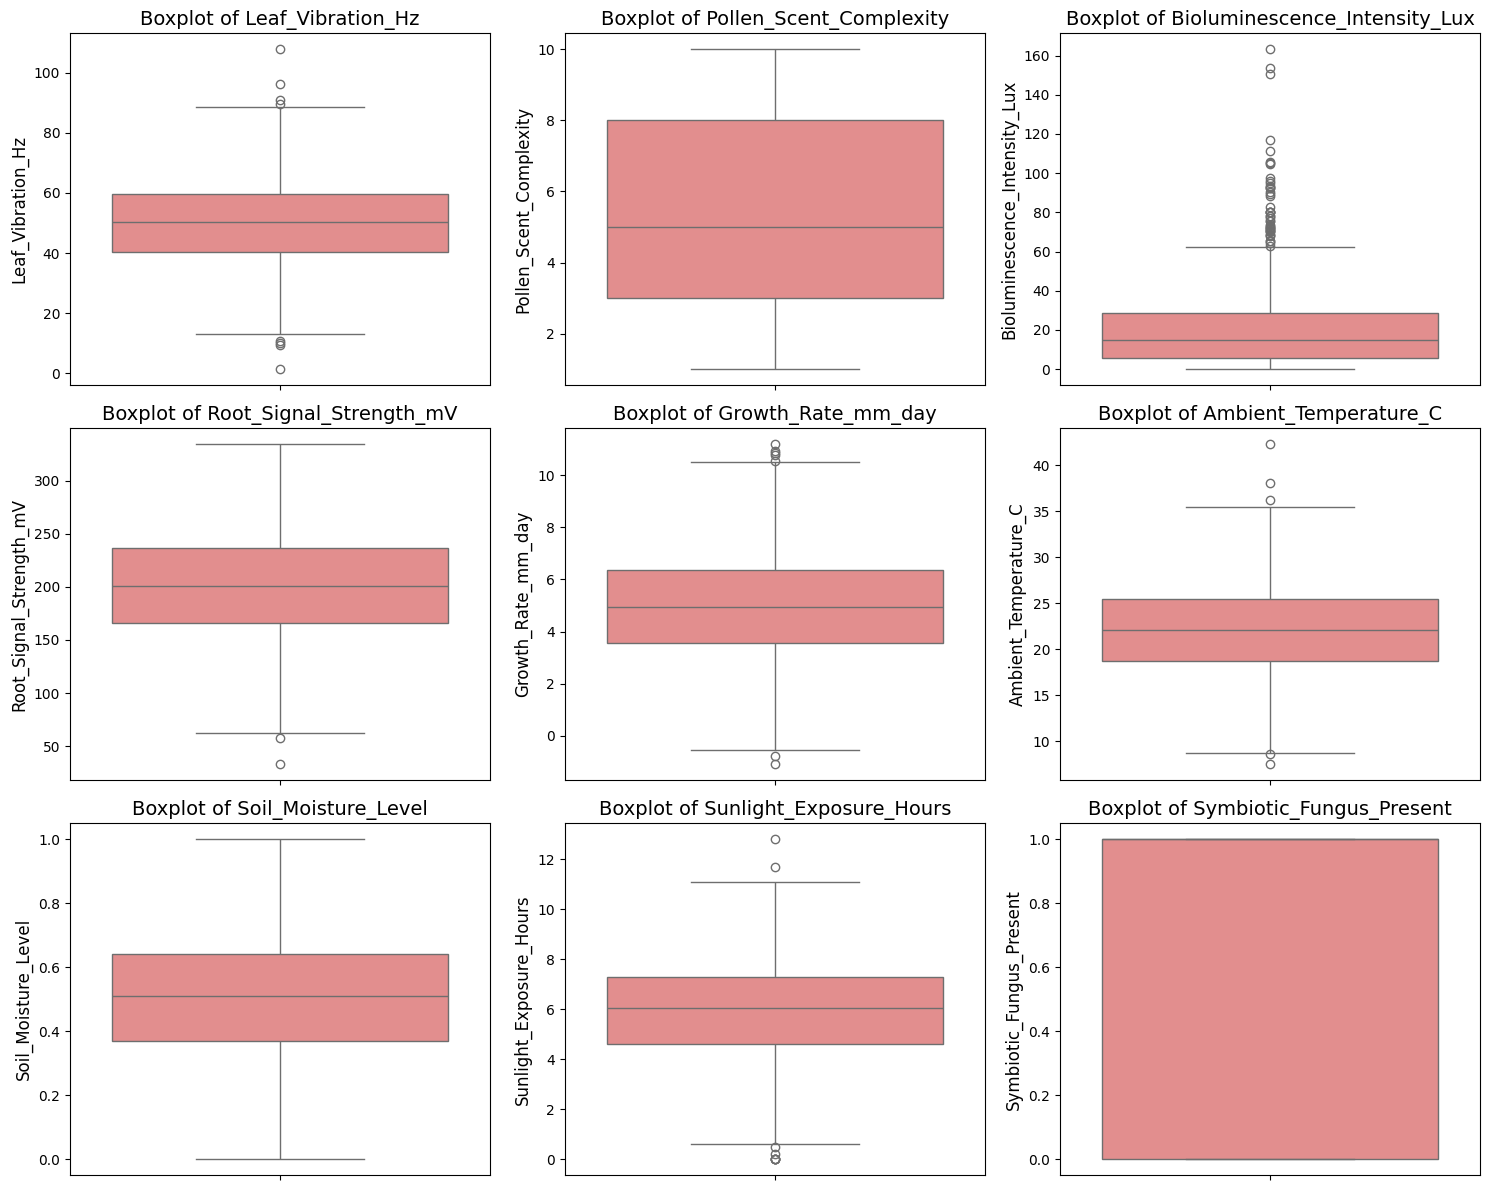

In [16]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

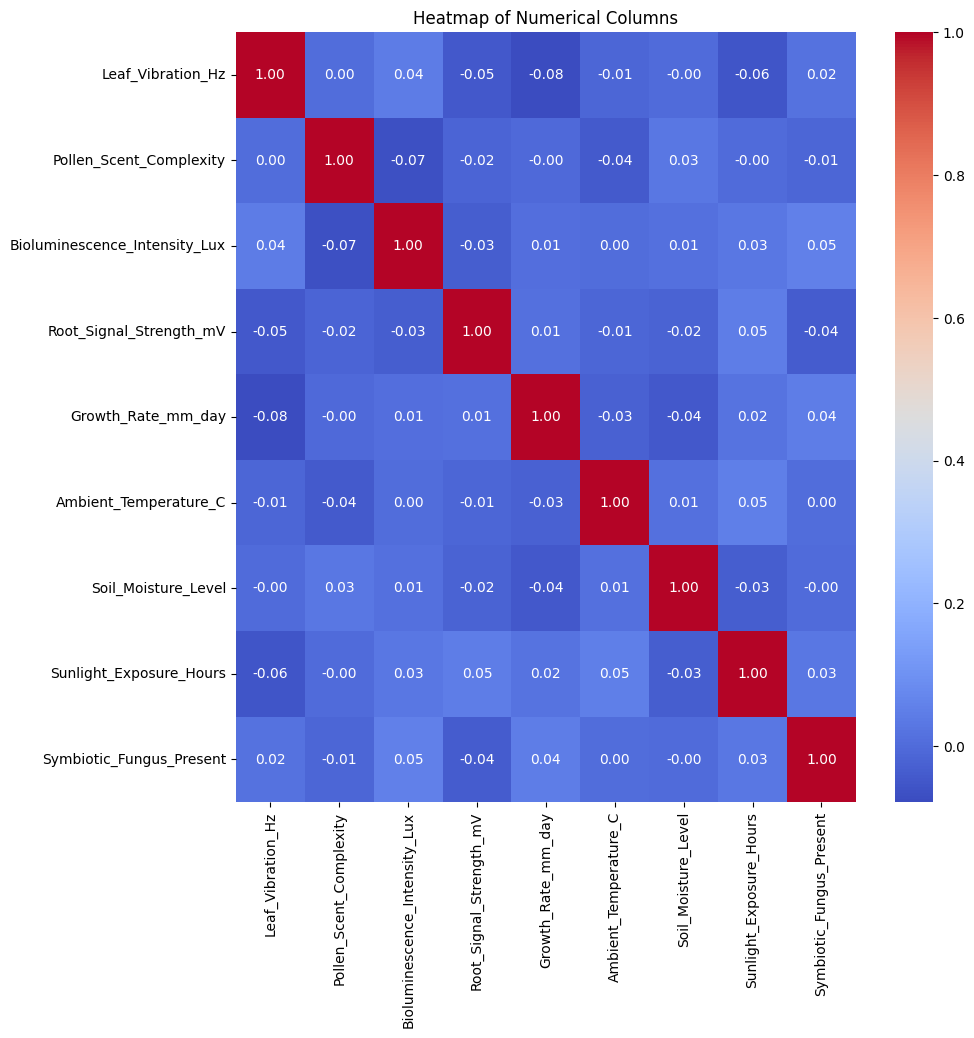

In [17]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [18]:
# Dropping unwanted column

df.drop(columns=['Plant_ID'], inplace=True)

In [19]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [20]:
X = df.drop(columns=['Plant_Message_Type'])
y = df['Plant_Message_Type']

In [21]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [23]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [25]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.355, 0.36, 0.275, 0.335, 0.36, 0.26, 0.365, 0.31, 0.36]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.99      0.53        72
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00        44

    accuracy                           0.35       200
   macro avg       0.09      0.25      0.13       200
weighted avg       0.13      0.35      0.19       200

Confusion Matrix:
 [[71  1  0  0]
 [45  0  0  0]
 [37  2  0  0]
 [42  2  0  0]]


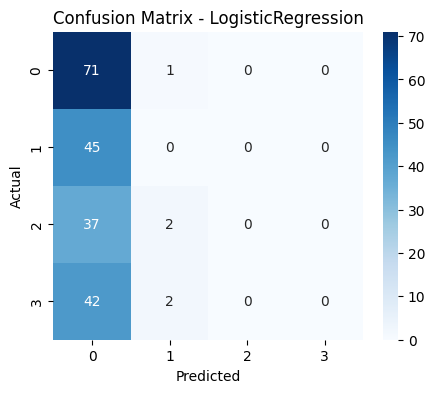

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.36      1.00      0.53        72
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00        44

    accuracy                           0.36       200
   macro avg       0.09      0.25      0.13       200
weighted avg       0.13      0.36      0.19       200

Confusion Matrix:
 [[72  0  0  0]
 [45  0  0  0]
 [37  2  0  0]
 [44  0  0  0]]


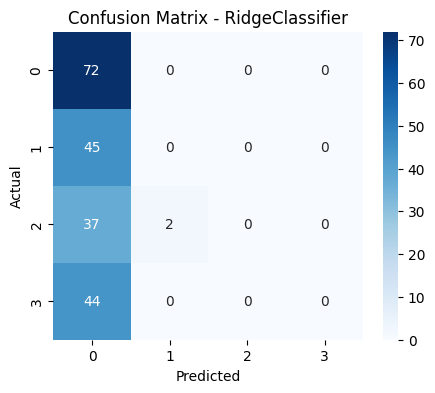

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.61      0.44        72
           1       0.13      0.04      0.07        45
           2       0.06      0.05      0.06        39
           3       0.25      0.16      0.19        44

    accuracy                           0.28       200
   macro avg       0.20      0.22      0.19       200
weighted avg       0.22      0.28      0.23       200

Confusion Matrix:
 [[44  7 15  6]
 [28  2  9  6]
 [26  2  2  9]
 [28  4  5  7]]


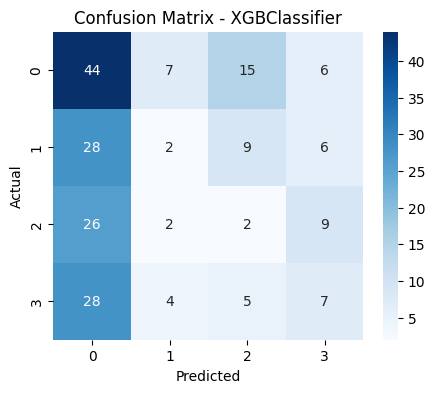

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.72      0.45        72
           1       0.11      0.04      0.06        45
           2       0.00      0.00      0.00        39
           3       0.21      0.07      0.10        44

    accuracy                           0.28       200
   macro avg       0.16      0.21      0.15       200
weighted avg       0.19      0.28      0.20       200

Confusion Matrix:
 [[52  7  7  6]
 [39  2  1  3]
 [30  7  0  2]
 [39  2  0  3]]


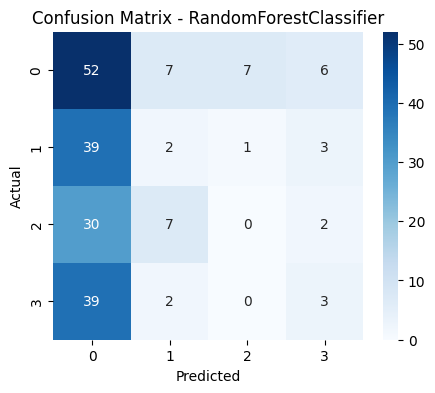

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.36      1.00      0.53        72
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00        44

    accuracy                           0.36       200
   macro avg       0.09      0.25      0.13       200
weighted avg       0.13      0.36      0.19       200

Confusion Matrix:
 [[72  0  0  0]
 [45  0  0  0]
 [38  1  0  0]
 [43  0  1  0]]


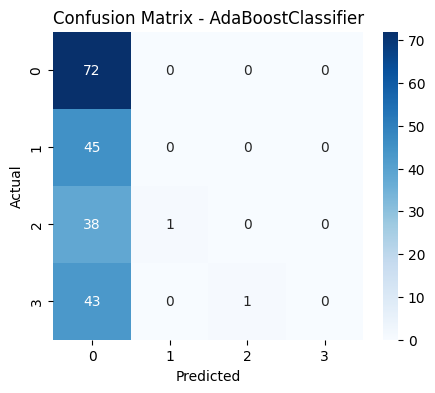

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.69      0.45        72
           1       0.12      0.04      0.06        45
           2       0.00      0.00      0.00        39
           3       0.06      0.02      0.03        44

    accuracy                           0.27       200
   macro avg       0.13      0.19      0.14       200
weighted avg       0.16      0.27      0.18       200

Confusion Matrix:
 [[50  5 10  7]
 [36  2  2  5]
 [29  6  0  4]
 [35  4  4  1]]


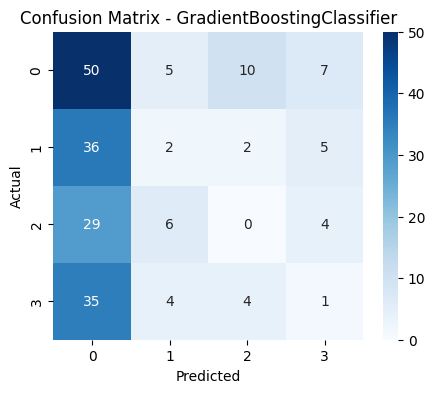

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.68      0.46        72
           1       0.20      0.11      0.14        45
           2       0.29      0.10      0.15        39
           3       0.21      0.09      0.13        44

    accuracy                           0.31       200
   macro avg       0.26      0.25      0.22       200
weighted avg       0.27      0.31      0.25       200

Confusion Matrix:
 [[49  9  8  6]
 [35  5  2  3]
 [22  7  4  6]
 [36  4  0  4]]


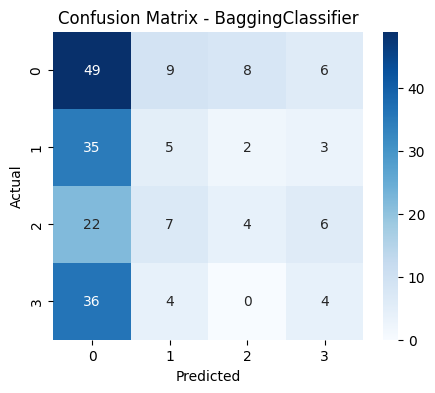

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.38      0.36        72
           1       0.24      0.24      0.24        45
           2       0.21      0.18      0.19        39
           3       0.26      0.25      0.26        44

    accuracy                           0.28       200
   macro avg       0.26      0.26      0.26       200
weighted avg       0.28      0.28      0.28       200

Confusion Matrix:
 [[27 18 11 16]
 [16 11 10  8]
 [16  9  7  7]
 [19  8  6 11]]


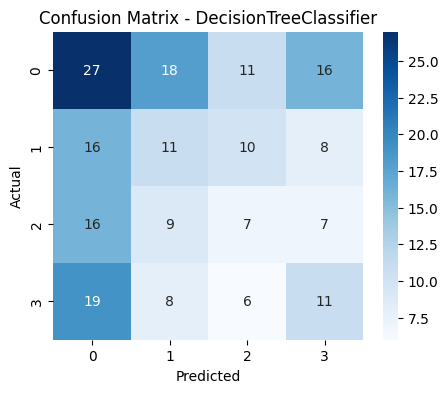

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.99      0.53        72
           1       1.00      0.02      0.04        45
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00        44

    accuracy                           0.36       200
   macro avg       0.34      0.25      0.14       200
weighted avg       0.35      0.36      0.20       200

Confusion Matrix:
 [[71  0  1  0]
 [44  1  0  0]
 [39  0  0  0]
 [44  0  0  0]]


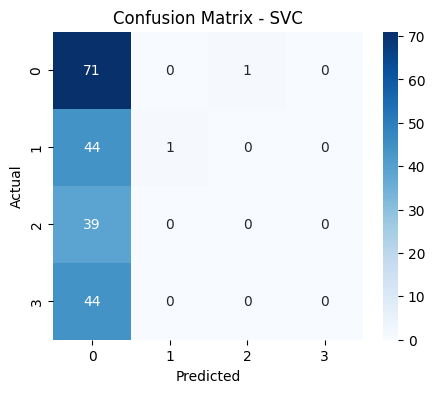

In [26]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()